# Arena0 behavioral analysis playground


In [1]:
# Imports
from pathlib import Path

import pandas as pd
import numpy as np
from numpy import logical_and as ele_AND
from numpy import logical_or as ele_OR
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datajoint as dj

from aeon.preprocess import api
from aeon_analysis.social import helpers



In [13]:
# Config

pd.set_option('display.max_rows', 100)
plt.rcParams["figure.figsize"] = (9.6, 6.4)
plt.rcParams['figure.dpi'] = 150

## Examine data via datajoint

In [ ]:
# Set DJ config

dj.config['database.host'] = 'aeon-db2'
dj.config['display.limit'] = 20  # rows per displayed table
dj.conn()

In [ ]:
# Set virtual schemas

#db_prefix = 'aeon_test_'
#experiment = dj.create_virtual_module('experiment', db_prefix + 'experiment')
#analysis = dj.create_virtual_module('analysis', db_prefix + 'analysis')

## Examine data via python api

In [3]:
# Read metadata and filter sessions

exp_root = '/nfs/winstor/delab/data/arena0.1/socialexperiment0'
session_metadata = helpers.loadSessions(exp_root)
# NOTE: data of 187.5 thresh sessions from 2022 02 15-17 is MISSING!
start_ts = pd.Timestamp('2022-01-16')
end_ts = pd.Timestamp('2022-02-11')
i_good_sess = (np.logical_and(session_metadata['start'] > start_ts, session_metadata[
    'start'] < end_ts))
session_metadata = session_metadata[i_good_sess]
# manual_metadata = pd.read_csv(
#     '/nfs/winstor/delab/data/arena0.1/exp01_session_spreadsheet_cohorta_2022_01.tsv')
bad_sess = [pd.Timestamp('2022-01-18 12:32:00'), pd.Timestamp('2022-01-19 12:28:00'),
            pd.Timestamp('2022-01-19 14:57:00'), pd.Timestamp('2022-01-31 14:18:00')]
i_bad_sess = [np.argmin(np.abs(session_metadata['start'] - ts)) for ts in bad_sess]
session_metadata.drop(index=session_metadata.iloc[i_bad_sess].index, inplace=True)
print(f"{len(session_metadata)} good sessions:\n")
session_metadata

31 good sessions:



,id,weight_start,weight_end,start,end,duration
47,BAA-1100704,25.7,29.7,2022-01-17 10:24:47.710979939,2022-01-17 11:28:14.822050095,0 days 01:03:27.111070156
48,BAA-1100705,24.3,28.1,2022-01-17 11:36:26.581890106,2022-01-17 12:41:47.300610065,0 days 01:05:20.718719959
49,BAA-1100706,24.2,28,2022-01-17 14:34:18.926300049,2022-01-17 15:37:23.350080013,0 days 01:03:04.423779964
51,BAA-1100706,24.4,28.7,2022-01-18 14:46:14.132450104,2022-01-18 16:19:42.259359836,0 days 01:33:28.126909732
54,BAA-1100705;BAA-1100706,23.3,NaN,2022-01-21 14:50:37.114620209,2022-01-21 16:30:37.114620209,0 days 01:40:00
55,BAA-1100704;BAA-1100705,24.9,NaN,2022-01-25 13:55:36.701499939,2022-01-25 15:35:36.701499939,0 days 01:40:00
56,BAA-1100704;BAA-1100706,25.6,NaN,2022-01-26 11:01:40.869019985,2022-01-26 12:41:40.869019985,0 days 01:40:00
57,BAA-1100705,25.7,28.4,2022-01-26 13:17:43.697410107,2022-01-26 14:49:14.045979977,0 days 01:31:30.348569870
58,BAA-1100705;BAA-1100706,25.3,NaN,2022-01-27 10:37:44.069220066,2022-01-27 12:17:44.069220066,0 days 01:40:00
59,BAA-1100704,24.4,31.1,2022-01-27 13:24:21.342370033,2022-01-27 14:56:17.727200031,0 days 01:31:56.384829998


In [4]:
# Final df placeholder

data = pd.DataFrame(
    columns=['SessionType', 'id', 'id2', 'thresh_change_ts', 'p1_thresh', 'p2_thresh',
             'p2-p1_thresh', 'p1_cum_wheel_dist', 'p2_cum_wheel_dist', 'p1_dist_pref',
             'p1_cum_wheel_dist_prethresh', 'p2_cum_wheel_dist_prethresh',
             'p1_cum_wheel_dist_postthresh', 'p2_cum_wheel_dist_postthresh',
             'p1_dist_pref_post_pre_ratio'], index=session_metadata.index)
data

,SessionType,id,id2,thresh_change_ts,p1_thresh,p2_thresh,p2-p1_thresh,p1_cum_wheel_dist,p2_cum_wheel_dist,p1_dist_pref,p1_cum_wheel_dist_prethresh,p2_cum_wheel_dist_prethresh,p1_cum_wheel_dist_postthresh,p2_cum_wheel_dist_postthresh,p1_dist_pref_post_pre_ratio
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Load session data (per patch: wheel distance travelled; pellet; patch)

for s in session_metadata.itertuples():
    # Load relevant data: per session per patch: patch, pellet, wheel distance
    p1_patch_data = api.patchdata(exp_root, 'Patch1', start=s.start, end=s.end)
    p2_patch_data = api.patchdata(exp_root, 'Patch2', start=s.start, end=s.end)
    p1_pellet_data = api.pelletdata(exp_root, 'Patch1', start=s.start, end=s.end)
    p2_pellet_data = api.patchdata(exp_root, 'Patch2', start=s.start, end=s.end)
    p1_wheel_data = api.encoderdata(exp_root, 'Patch1', start=s.start, end=s.end)
    p2_wheel_data = api.encoderdata(exp_root, 'Patch2', start=s.start, end=s.end)

    # Set up `data` df
    data.loc[s.Index, "SessionType"] = "social" if ";" in s.id else "individual"
    if ";" in s.id:
        data.loc[s.Index, "id"], data.loc[s.Index, "id2"] = s.id.split(";")
    else:
        data.loc[s.Index, "id"] = s.id
    both_patch_data = pd.concat([p1_patch_data, p2_patch_data])
    change_ts = (
        both_patch_data.iloc[np.where(np.diff(both_patch_data.threshold))[0][0]].name)
    data.loc[s.Index, "thresh_change_ts"] = change_ts
    data.loc[s.Index, "p1_thresh"] = np.max(p1_patch_data.threshold) / 100
    data.loc[s.Index, "p2_thresh"] = np.max(p2_patch_data.threshold) / 100
    data.loc[s.Index, "p2-p1_thresh"] = (
            data.loc[s.Index, "p2_thresh"] - data.loc[s.Index, "p1_thresh"])
    p1_dist = api.distancetravelled(p1_wheel_data.angle) / 100
    p2_dist = api.distancetravelled(p2_wheel_data.angle) / 100
    data.loc[s.Index, "p1_cum_wheel_dist"] = p1_dist[-1]
    data.loc[s.Index, "p2_cum_wheel_dist"] = p2_dist[-1]
    data.loc[s.Index, "p1_dist_pref"] = p1_dist[-1] / (p1_dist[-1] + p2_dist[-1])
    p1_dist_pre = p1_dist[p1_dist.index > change_ts][0]
    p2_dist_pre = p2_dist[p2_dist.index > change_ts][0]
    p1_dist_post = p1_dist[-1] - (p1_dist[p1_dist.index > change_ts][0])
    p2_dist_post = p2_dist[-1] - (p2_dist[p2_dist.index > change_ts][0])
    data.loc[s.Index, "p1_cum_wheel_dist_prethresh"] = p1_dist_pre
    data.loc[s.Index, "p2_cum_wheel_dist_prethresh"] = p2_dist_pre
    data.loc[s.Index, "p1_cum_wheel_dist_postthresh"] = p1_dist_post
    data.loc[s.Index, "p2_cum_wheel_dist_postthresh"] = p2_dist_post
    p1_pref_post = p1_dist_post / (p1_dist_post + p2_dist_post)
    p1_pref_pre = p1_dist_pre / (p1_dist_pre + p2_dist_pre)
    data.loc[s.Index, "p1_dist_pref_post_pre_ratio"] = p1_pref_post / p1_pref_pre             

In [6]:
# Set `data` datatypes and view

data = data.astype({'SessionType': 'category', 'p1_thresh': 'int', 'p2_thresh': 'int',
             'p2-p1_thresh': 'int', 'p1_cum_wheel_dist': 'float',
             'p2_cum_wheel_dist': 'float', 'p1_dist_pref': 'float',
             'p1_cum_wheel_dist_prethresh': 'float', 'p2_cum_wheel_dist_prethresh': 'float',
             'p1_cum_wheel_dist_postthresh': 'float', 'p2_cum_wheel_dist_postthresh': 'float',
             'p1_dist_pref_post_pre_ratio': 'float'})
data

,SessionType,id,id2,thresh_change_ts,p1_thresh,p2_thresh,p2-p1_thresh,p1_cum_wheel_dist,p2_cum_wheel_dist,p1_dist_pref,p1_cum_wheel_dist_prethresh,p2_cum_wheel_dist_prethresh,p1_cum_wheel_dist_postthresh,p2_cum_wheel_dist_postthresh,p1_dist_pref_post_pre_ratio
47,individual,BAA-1100704,NaN,2022-01-17 10:35:53.932000160,15,1,-14,65.282491,105.264060,0.382784,22.016653,9.175100,43.265838,96.088960,0.439857
48,individual,BAA-1100705,NaN,2022-01-17 11:51:50.605979919,1,15,14,83.629837,113.845258,0.423496,6.302392,55.058314,77.327445,58.786944,5.531139
49,individual,BAA-1100706,NaN,2022-01-17 14:48:27.868000031,1,15,14,71.347239,62.179150,0.534331,18.196685,29.024228,53.150555,33.154923,1.598128
51,individual,BAA-1100706,NaN,2022-01-18 14:59:50.868000031,1,15,14,120.408903,68.198460,0.638410,7.158804,44.042295,113.250099,24.156165,5.894824
54,social,BAA-1100705,BAA-1100706,2022-01-21 15:04:47.383999825,1,15,14,266.784317,170.109769,0.610638,47.296834,72.071323,219.487483,98.038447,1.744564
55,social,BAA-1100704,BAA-1100705,2022-01-25 14:10:34.831999779,1,15,14,227.003358,153.501389,0.596585,20.137427,92.102039,206.865932,61.399350,4.297997
56,social,BAA-1100704,BAA-1100706,2022-01-26 11:17:00.987999916,15,1,-14,104.650660,204.001615,0.339057,46.038371,57.126646,58.612289,146.874970,0.639170
57,individual,BAA-1100705,NaN,2022-01-26 13:32:02.035999775,1,15,14,45.905198,55.229609,0.453901,0.711703,38.041210,45.193495,17.188399,39.447805
58,social,BAA-1100705,BAA-1100706,2022-01-27 10:52:54.423999786,1,15,14,203.361354,127.526732,0.614593,31.456672,59.058812,171.904682,68.467920,2.057846
59,individual,BAA-1100704,NaN,2022-01-27 13:40:35.423999786,1,15,14,138.250204,81.668017,0.628644,15.142496,41.040096,123.107708,40.627921,2.789628


In [7]:
# Threshold values for individual sessions:
print(f"Total number of individual sessions: ", end="")
print(len(data[data.SessionType == "individual"]))
data[data.SessionType == "individual"][["id", "id2", "p2-p1_thresh"]]

Total number of individual sessions: 21


,id,id2,p2-p1_thresh
47,BAA-1100704,NaN,-14
48,BAA-1100705,NaN,14
49,BAA-1100706,NaN,14
51,BAA-1100706,NaN,14
57,BAA-1100705,NaN,14
59,BAA-1100704,NaN,14
60,BAA-1100706,NaN,-14
61,BAA-1100705,NaN,-14
62,BAA-1100704,NaN,14
63,BAA-1100704,NaN,6


In [8]:
# Threshold values for social sessions:
print(f"Total number of social sessions: ", end="")
print(len(data[data.SessionType == "social"]))
data[data.SessionType == "social"][["id", "id2", "p2-p1_thresh"]]

Total number of social sessions: 10


,id,id2,p2-p1_thresh
54,BAA-1100705,BAA-1100706,14
55,BAA-1100704,BAA-1100705,14
56,BAA-1100704,BAA-1100706,-14
58,BAA-1100705,BAA-1100706,14
67,BAA-1100704,BAA-1100705,-6
68,BAA-1100704,BAA-1100706,6
70,BAA-1100705,BAA-1100706,6
76,BAA-1100704,BAA-1100705,2
78,BAA-1100704,BAA-1100706,-2
80,BAA-1100705,BAA-1100706,-2


## Generate psychometric plots

## For threshold-change-normalized patch preference

Text(0.5, 1.0, 'All Sessions')

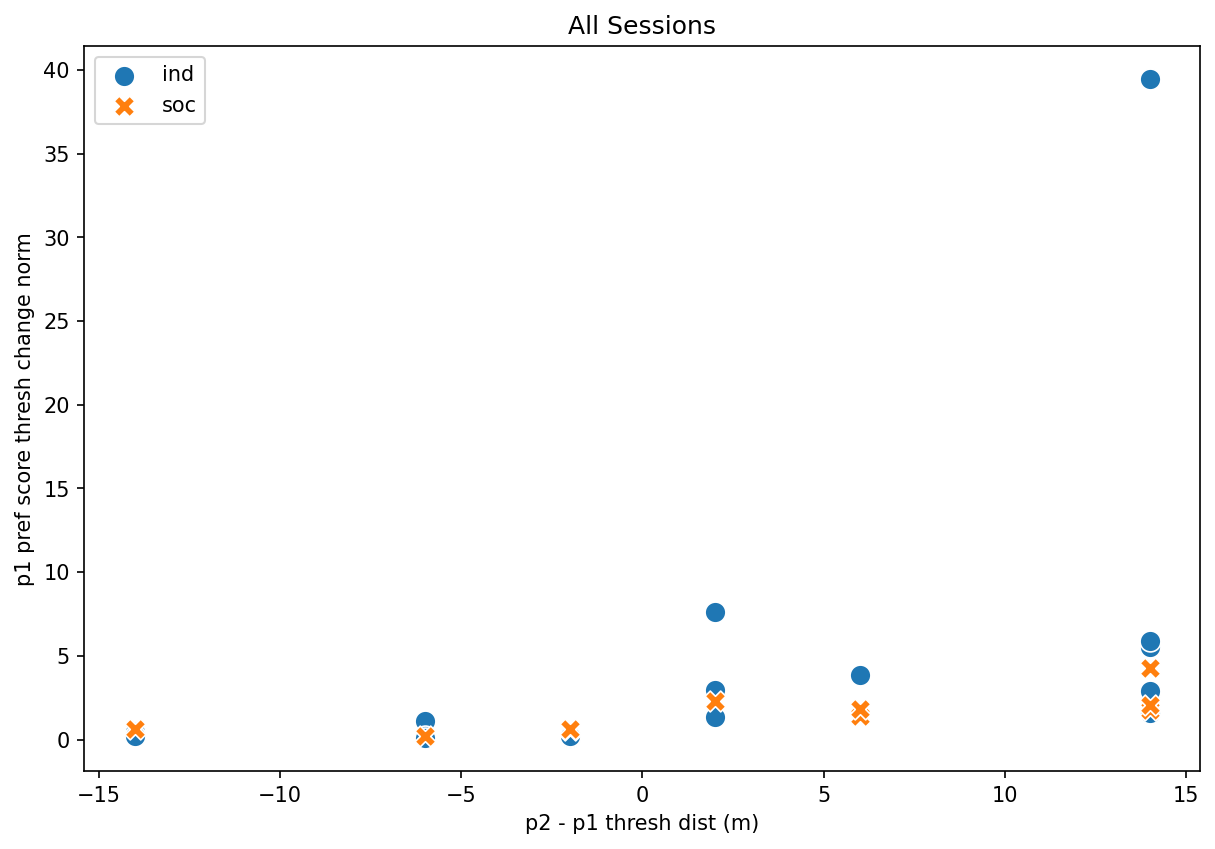

In [15]:
# Scatter of individual vs. social for all sessions

fig, ax = plt.subplots()
ind_scores = data[data.SessionType == "individual"][["p2-p1_thresh",
    "p1_dist_pref_post_pre_ratio"]]
soc_scores = data[data.SessionType == "social"][["p2-p1_thresh",
    "p1_dist_pref_post_pre_ratio"]]
sns.scatterplot(ax=ax, x=ind_scores['p2-p1_thresh'], 
                y=ind_scores['p1_dist_pref_post_pre_ratio'],
                marker="o", s=100)
sns.scatterplot(ax=ax, x=soc_scores['p2-p1_thresh'],
                y=soc_scores['p1_dist_pref_post_pre_ratio'],
                marker="X", s=100)
ax.set_xlabel('p2 - p1 thresh dist (m)')
ax.set_ylabel('p1 pref score thresh change norm')
ax.legend(['ind', 'soc'])
ax.set_title('All Sessions')

Text(0.5, 1.0, 'All Sessions')

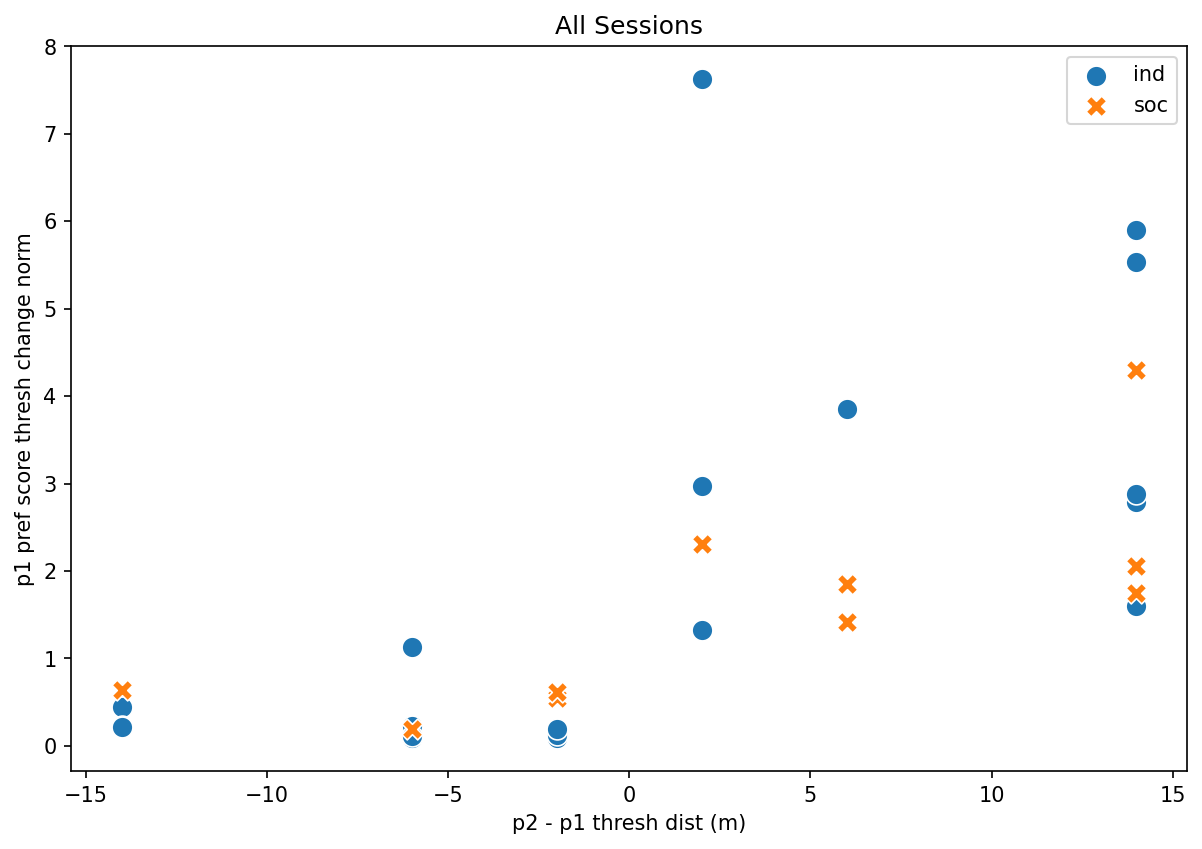

In [16]:
# Scatter without outlier

fig, ax = plt.subplots()
data2 = data.loc[data["p1_dist_pref_post_pre_ratio"] < 10]
ind_scores = data2[data2.SessionType == "individual"][["p2-p1_thresh",
    "p1_dist_pref_post_pre_ratio"]]
soc_scores = data2[data2.SessionType == "social"][["p2-p1_thresh",
    "p1_dist_pref_post_pre_ratio"]]
sns.scatterplot(ax=ax, x=ind_scores['p2-p1_thresh'], 
                y=ind_scores['p1_dist_pref_post_pre_ratio'],
                marker="o", s=100)
sns.scatterplot(ax=ax, x=soc_scores['p2-p1_thresh'],
                y=soc_scores['p1_dist_pref_post_pre_ratio'],
                marker="X", s=100)
ax.set_xlabel('p2 - p1 thresh dist (m)')
ax.set_ylabel('p1 pref score thresh change norm')
ax.legend(['ind', 'soc'])
ax.set_title('All Sessions')

Text(0.5, 1.0, 'All Sessions')

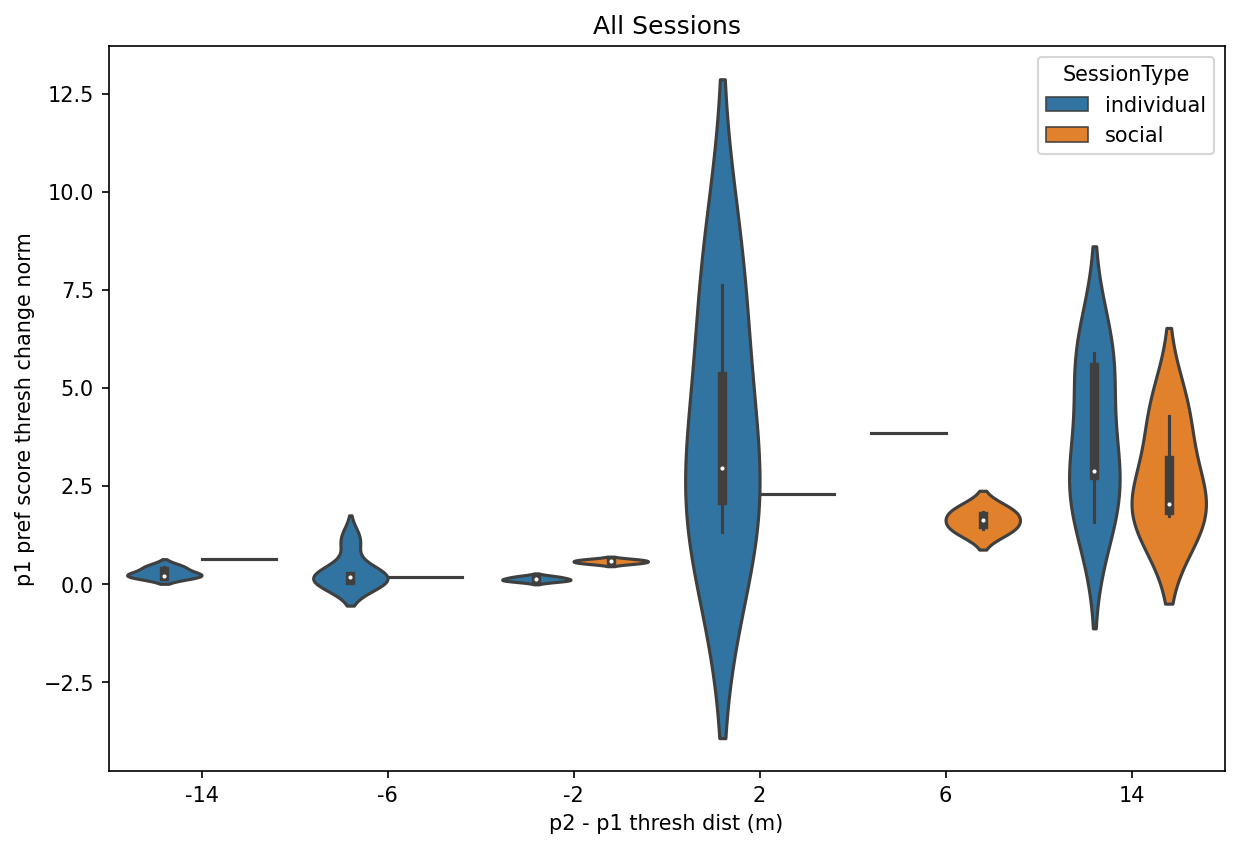

In [17]:
# Violin without outlier

fig, ax = plt.subplots()
sns.violinplot(ax=ax, data=data2, x="p2-p1_thresh", y="p1_dist_pref_post_pre_ratio", hue="SessionType")
ax.set_xlabel('p2 - p1 thresh dist (m)')
ax.set_ylabel('p1 pref score thresh change norm')
ax.set_title('All Sessions')

Text(0.5, 1.0, 'BAA-1100704 Sessions')

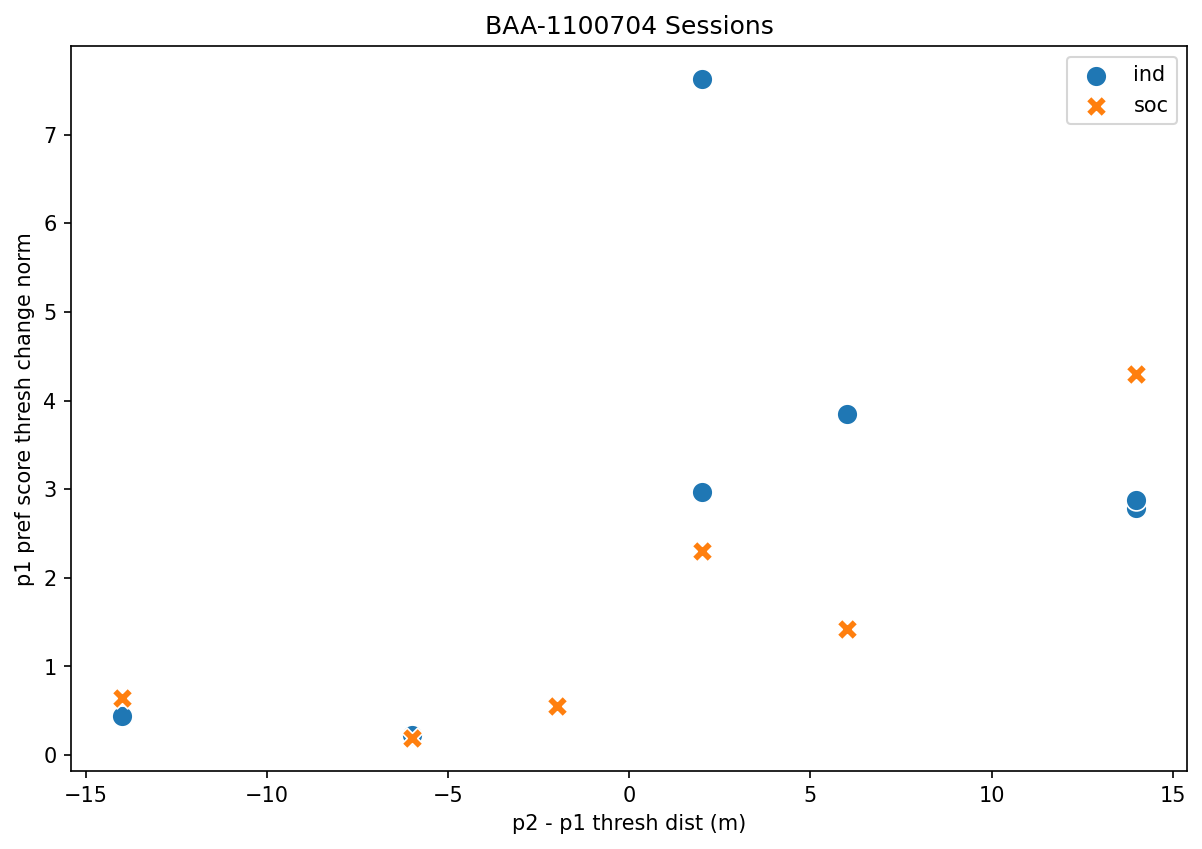

In [18]:
# 704 session scatters

aid = "BAA-1100704"
fig, ax = plt.subplots()
ind_scores = data2[ele_AND(data2.SessionType == "individual", data2.id == aid)][["p2-p1_thresh", "p1_dist_pref_post_pre_ratio"]]
soc_scores = data2[ele_AND(data2.SessionType == "social", ele_OR(data2.id == aid, data2.id2 == aid))][["p2-p1_thresh", "p1_dist_pref_post_pre_ratio"]]
sns.scatterplot(ax=ax, x=ind_scores['p2-p1_thresh'], 
                y=ind_scores['p1_dist_pref_post_pre_ratio'],
                marker="o", s=100)
sns.scatterplot(ax=ax, x=soc_scores['p2-p1_thresh'],
                y=soc_scores['p1_dist_pref_post_pre_ratio'],
                marker="X", s=100)
ax.set_xlabel('p2 - p1 thresh dist (m)')
ax.set_ylabel('p1 pref score thresh change norm')
ax.legend(['ind', 'soc'])
ax.set_title(f'{aid} Sessions')

Text(0.5, 1.0, 'BAA-1100705 Sessions')

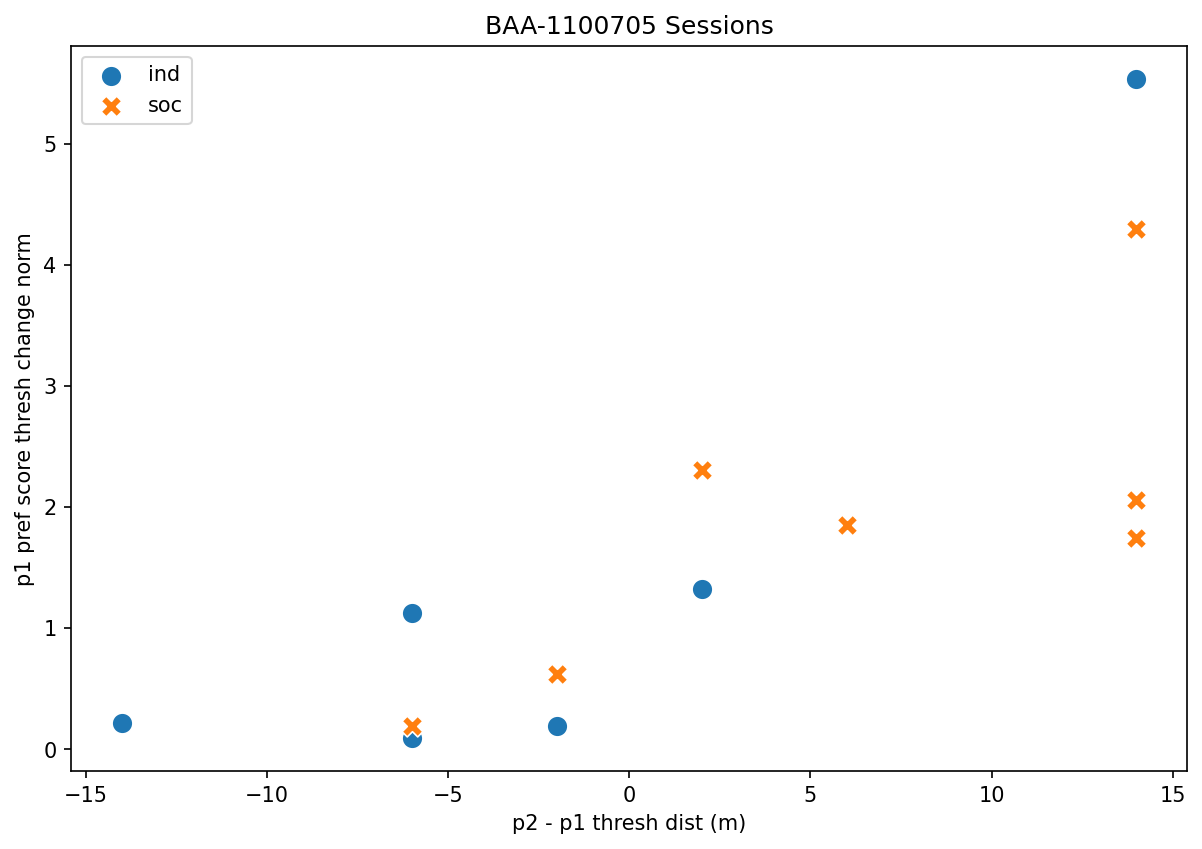

In [19]:
# 705 session scatters

aid = "BAA-1100705"
fig, ax = plt.subplots()
ind_scores = data2[ele_AND(data2.SessionType == "individual", data2.id == aid)][["p2-p1_thresh", "p1_dist_pref_post_pre_ratio"]]
soc_scores = data2[ele_AND(data2.SessionType == "social", ele_OR(data2.id == aid, data2.id2 == aid))][["p2-p1_thresh", "p1_dist_pref_post_pre_ratio"]]
sns.scatterplot(ax=ax, x=ind_scores['p2-p1_thresh'], 
                y=ind_scores['p1_dist_pref_post_pre_ratio'],
                marker="o", s=100)
sns.scatterplot(ax=ax, x=soc_scores['p2-p1_thresh'],
                y=soc_scores['p1_dist_pref_post_pre_ratio'],
                marker="X", s=100)
ax.set_xlabel('p2 - p1 thresh dist (m)')
ax.set_ylabel('p1 pref score thresh change norm')
ax.legend(['ind', 'soc'])
ax.set_title(f'{aid} Sessions')

Text(0.5, 1.0, 'BAA-1100706 Sessions')

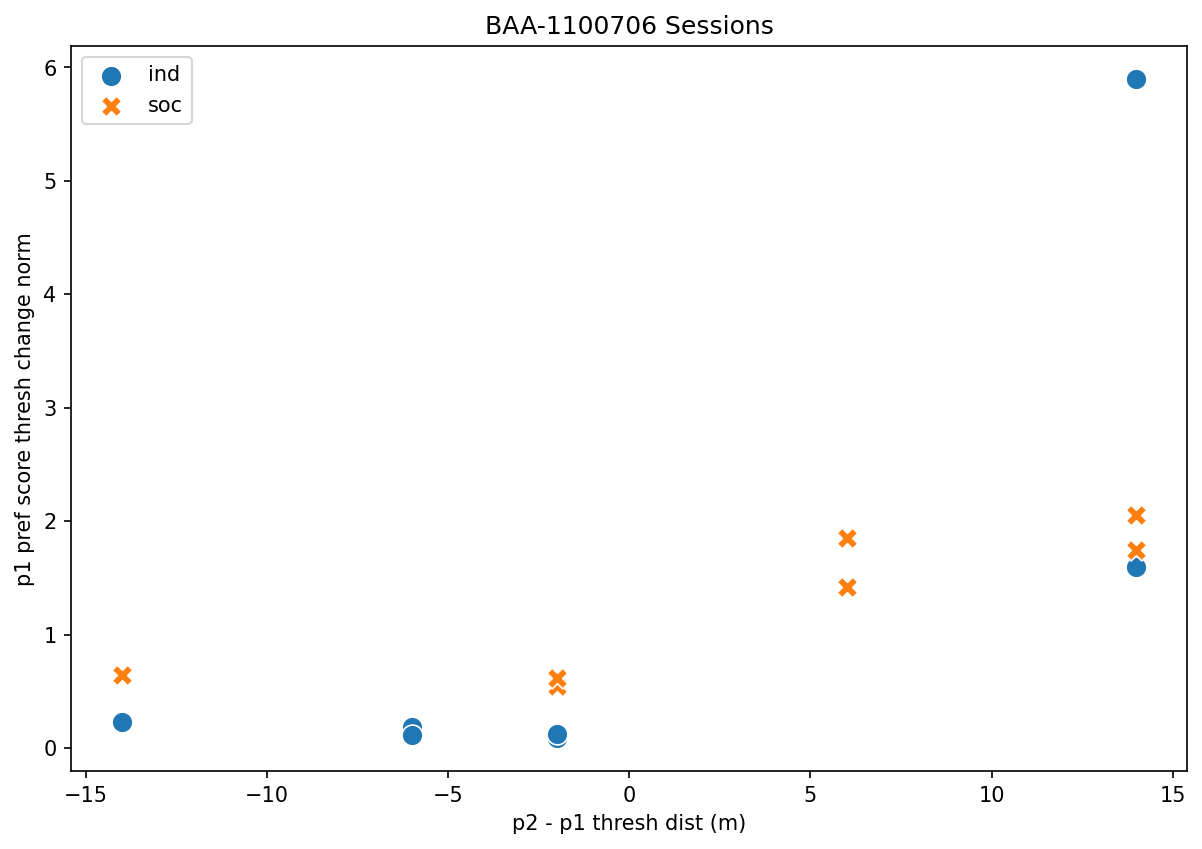

In [20]:
# 706

aid = "BAA-1100706"
fig, ax = plt.subplots()
ind_scores = data2[ele_AND(data2.SessionType == "individual", data2.id == aid)][["p2-p1_thresh", "p1_dist_pref_post_pre_ratio"]]
soc_scores = data2[ele_AND(data2.SessionType == "social", ele_OR(data2.id == aid, data2.id2 == aid))][["p2-p1_thresh", "p1_dist_pref_post_pre_ratio"]]
sns.scatterplot(ax=ax, x=ind_scores['p2-p1_thresh'], 
                y=ind_scores['p1_dist_pref_post_pre_ratio'],
                marker="o", s=100)
sns.scatterplot(ax=ax, x=soc_scores['p2-p1_thresh'],
                y=soc_scores['p1_dist_pref_post_pre_ratio'],
                marker="X", s=100)
ax.set_xlabel('p2 - p1 thresh dist (m)')
ax.set_ylabel('p1 pref score thresh change norm')
ax.legend(['ind', 'soc'])
ax.set_title(f'{aid} Sessions')

## For entire session patch preference

Text(0.5, 1.0, 'All Sessions')

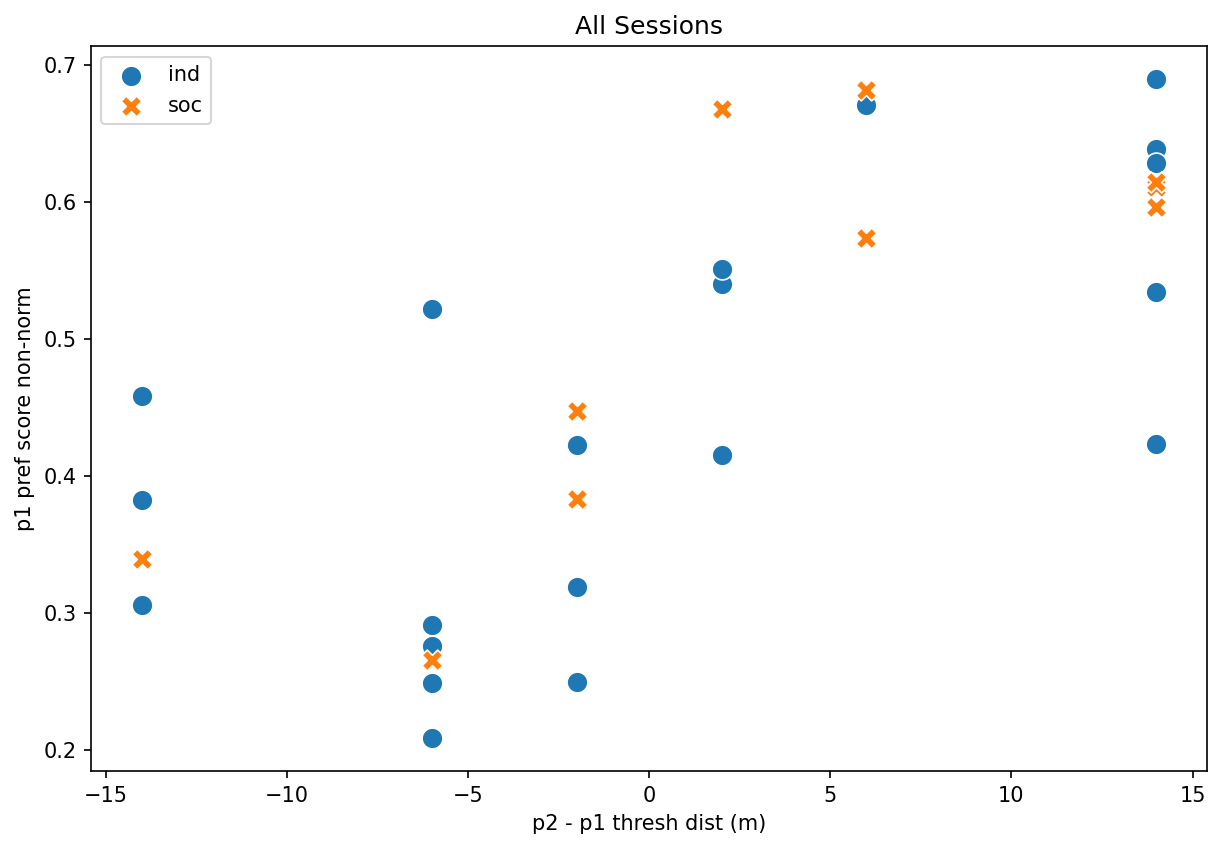

In [21]:
# All sessions scatter

fig, ax = plt.subplots()
ind_scores = data2[data2.SessionType == "individual"][["p2-p1_thresh", "p1_dist_pref"]]
soc_scores = data2[data2.SessionType == "social"][["p2-p1_thresh", "p1_dist_pref"]]
sns.scatterplot(ax=ax, x=ind_scores['p2-p1_thresh'], 
                y=ind_scores['p1_dist_pref'],
                marker="o", s=100)
sns.scatterplot(ax=ax, x=soc_scores['p2-p1_thresh'],
                y=soc_scores['p1_dist_pref'],
                marker="X", s=100)
ax.set_xlabel('p2 - p1 thresh dist (m)')
ax.set_ylabel('p1 pref score non-norm')
ax.legend(['ind', 'soc'])
ax.set_title('All Sessions')

Text(0.5, 1.0, 'All Sessions')

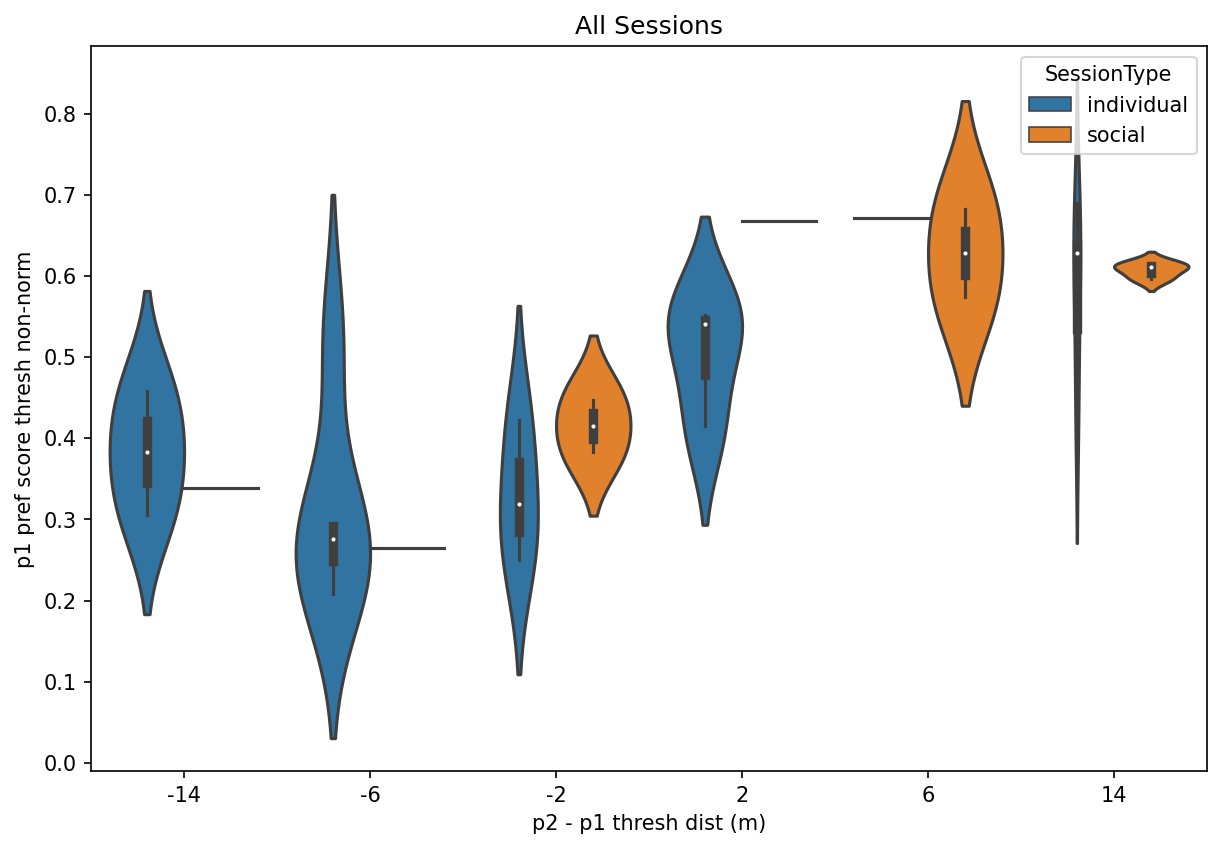

In [22]:
# All sessions violin

fig, ax = plt.subplots()
sns.violinplot(ax=ax, data=data2, x="p2-p1_thresh", y="p1_dist_pref", hue="SessionType")
ax.set_xlabel('p2 - p1 thresh dist (m)')
ax.set_ylabel('p1 pref score thresh non-norm')
ax.set_title('All Sessions')